# Tugas Tutorial 2

### ME3102 Analisis Data Cuaca dan Iklim I

#### Nafal Shaquille Muhammad - 12821039

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as crt

### Numerical Data Summary

In [3]:
# Akses data tableA1 dan menampilkan 5 entri pertama
meteoData = pd.read_csv('tableA1.txt', delimiter='\t', header=None, names=['date', 'pr1', 'tx1', 'tn1', 'pr2', 'tx2', 'tn2'])
meteoData.head()


,date,pr1,tx1,tn1,pr2,tx2,tn2
0,1,0.00,33,19,0.00,34,28
1,2,0.07,32,25,0.04,36,28
2,3,1.11,30,22,0.84,30,26
3,4,0.00,29,-1,0.00,29,19
4,5,0.00,25,4,0.00,30,16


In [4]:
# Menampilkan numerical summary secara singkat
dataSmry = meteoData.describe()
dataSmry

,date,pr1,tx1,tn1,pr2,tx2,tn2
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,0.101613,29.870968,13.000000,0.077419,31.774194,20.225806
std,9.092121,0.242887,7.714670,13.618615,0.167650,7.864306,8.807988
min,1.000000,0.000000,9.000000,-13.000000,0.000000,11.000000,2.000000
25%,8.500000,0.000000,26.000000,1.000000,0.000000,27.500000,14.000000
50%,16.000000,0.000000,30.000000,19.000000,0.020000,31.000000,23.000000
75%,23.500000,0.050000,33.000000,23.500000,0.055000,36.000000,26.500000
max,31.000000,1.110000,53.000000,29.000000,0.840000,51.000000,38.000000


In [5]:
# Menampilkan rata-rata (mean) dari data
dataMean = meteoData.mean()
dataMean

date    16.000000
pr1      0.101613
tx1     29.870968
tn1     13.000000
pr2      0.077419
tx2     31.774194
tn2     20.225806
dtype: float64

In [6]:
# Menampilkan nilai tengah (Median/Kuartil 2) dari data
dataMedian = meteoData.median()
dataMedian

date    16.00
pr1      0.00
tx1     30.00
tn1     19.00
pr2      0.02
tx2     31.00
tn2     23.00
dtype: float64

In [7]:
# Menampilkan standar deviasi dari data
dataStd = meteoData.std()
dataStd

date     9.092121
pr1      0.242887
tx1      7.714670
tn1     13.618615
pr2      0.167650
tx2      7.864306
tn2      8.807988
dtype: float64

In [8]:
# Menampilkan variansi dari data
dataVar = meteoData.var()
dataVar

date     82.666667
pr1       0.058994
tx1      59.516129
tn1     185.466667
pr2       0.028106
tx2      61.847312
tn2      77.580645
dtype: float64

In [9]:
# Menampilkan kuartil 1 dari data
dataQuan1 = meteoData.quantile(0.25)
dataQuan1

date     8.5
pr1      0.0
tx1     26.0
tn1      1.0
pr2      0.0
tx2     27.5
tn2     14.0
Name: 0.25, dtype: float64

In [10]:
# Menampilkan kuartil 3 dari data
dataQuan3 = meteoData.quantile(0.75)
dataQuan3

date    23.500
pr1      0.050
tx1     33.000
tn1     23.500
pr2      0.055
tx2     36.000
tn2     26.500
Name: 0.75, dtype: float64

In [11]:
# Menampilkan jangkauan antar kuartil dari data
dataInterQRange = dataQuan3 - dataQuan1
dataInterQRange

date    15.000
pr1      0.050
tx1      7.000
tn1     22.500
pr2      0.055
tx2      8.500
tn2     12.500
dtype: float64

In [12]:
# Menampilkan skewness dari data
dataSkewn = meteoData.skew()
dataSkewn

date    0.000000
pr1     3.172545
tx1     0.360183
tn1    -0.647525
pr2     3.615701
tx2    -0.102691
tn2    -0.442606
dtype: float64

In [13]:
# Menampilkan kurtosis dari data
dataKurt = meteoData.kurt()
dataKurt

date    -1.200000
pr1     10.507109
tx1      3.229610
tn1     -0.964821
pr2     14.709321
tx2      1.202209
tn2     -0.373286
dtype: float64

In [14]:
# Menampilkan nilai minimum dari data
dataMinV = meteoData.min()
dataMinV

date     1.0
pr1      0.0
tx1      9.0
tn1    -13.0
pr2      0.0
tx2     11.0
tn2      2.0
dtype: float64

In [15]:
# Menampilkan nilai maksimum dari data
dataMaxV = meteoData.max()
dataMaxV

date    31.00
pr1      1.11
tx1     53.00
tn1     29.00
pr2      0.84
tx2     51.00
tn2     38.00
dtype: float64

In [16]:
# Menampilkan Trimean dari data
dataTriMean = (dataQuan1 + 2*dataMedian + dataQuan3)/4
dataTriMean

date    16.00000
pr1      0.01250
tx1     29.75000
tn1     15.62500
pr2      0.02375
tx2     31.37500
tn2     21.62500
dtype: float64

### Pemetaan Data Spasio-Temporal

In [2]:
import xarray as xr
import cartopy as crt

In [3]:
# Akses data curah hujan per bulan
precipData = xr.open_dataarray('MSWEP_MON_INA_197902-202011.nc')

In [7]:
# Variansi Data
prClimVar = precipData.groupby('time.season').var()
prClimMin = precipData.groupby('time.season').min()
prClimMax = precipData.groupby('time.season').max()
prClimQ1 = precipData.groupby('time.season').quantile(0.25)
prClimQ3 = precipData.groupby('time.season').quantile(0.75) 

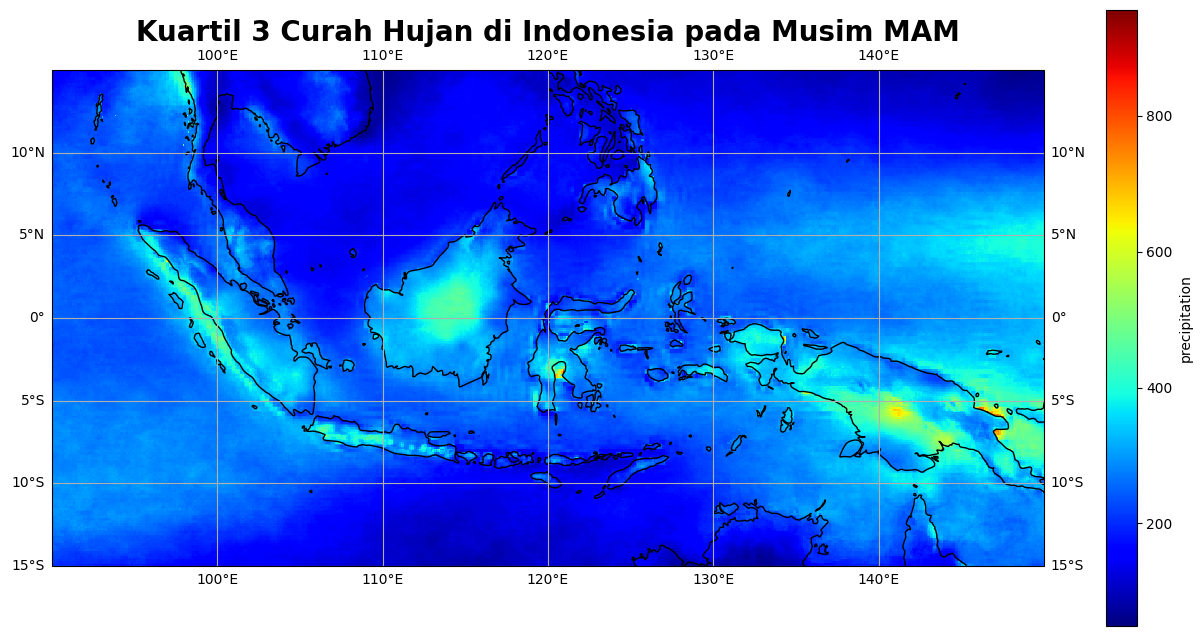

In [35]:
# Plot Musim MAM 
prj = crt.crs.PlateCarree()

fgr = plt.figure(figsize=(16,8))
axs = plt.axes(projection = prj)
prClimQ3.sel(season = 'MAM').plot(ax = axs, transform = prj, cmap = 'jet') # ubah variabel dengan yang diinginkan
axs.set_title('Kuartil 3 Curah Hujan di Indonesia pada Musim MAM', fontsize = 20, fontweight = 'bold')
axs.coastlines()
axs.gridlines(draw_labels = True) 

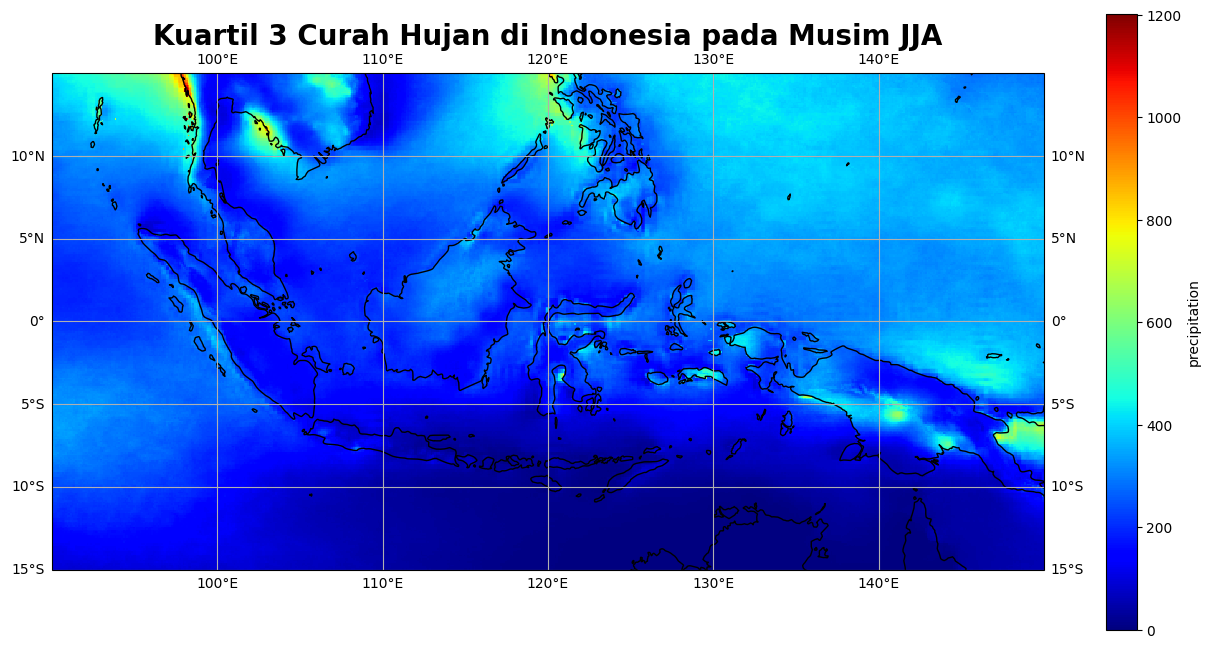

In [36]:
# Plot Musim JJA
prj = crt.crs.PlateCarree()
fgr = plt.figure(figsize=(16,8))
axs = plt.axes(projection = prj)
prClimQ3.sel(season = 'JJA').plot(ax = axs, transform = prj, cmap = 'jet') # ubah variabel dengan yang diinginkan
axs.set_title('Kuartil 3 Curah Hujan di Indonesia pada Musim JJA', fontsize = 20, fontweight = 'bold')
axs.coastlines()
axs.gridlines(draw_labels = True) 

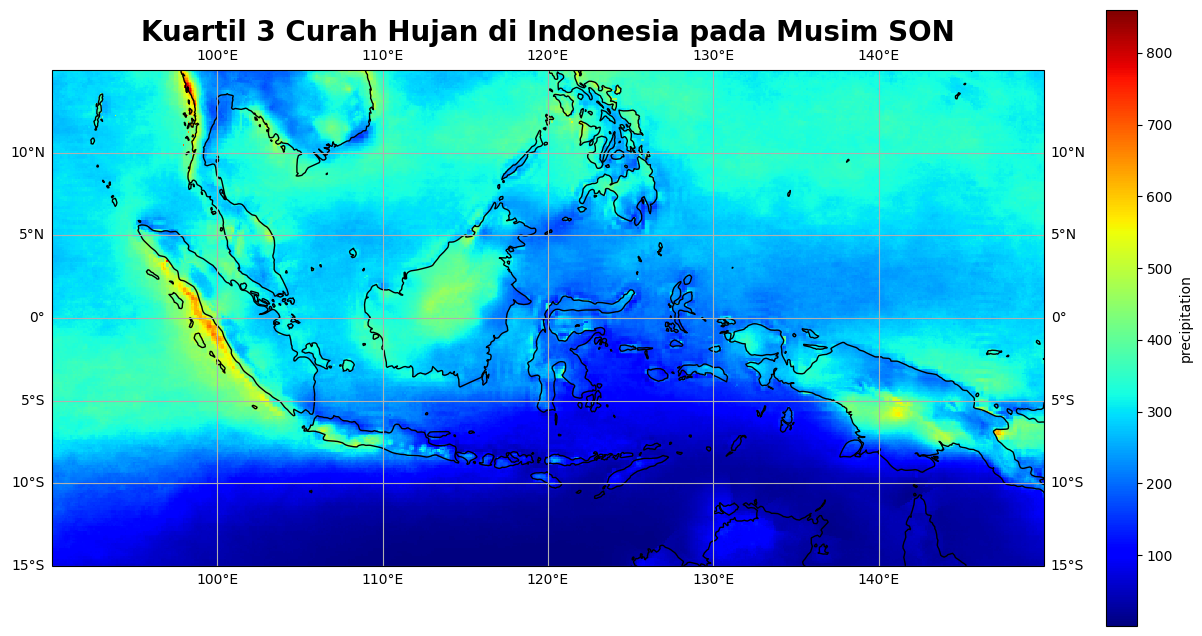

In [37]:
# Plot Musim SON
prj = crt.crs.PlateCarree()
fgr = plt.figure(figsize=(16,8))
axs = plt.axes(projection = prj)
prClimQ3.sel(season = 'SON').plot(ax = axs, transform = prj, cmap = 'jet') # ubah variabel dengan yang diinginkan
axs.set_title('Kuartil 3 Curah Hujan di Indonesia pada Musim SON', fontsize = 20, fontweight = 'bold')
axs.coastlines()
axs.gridlines(draw_labels = True) 

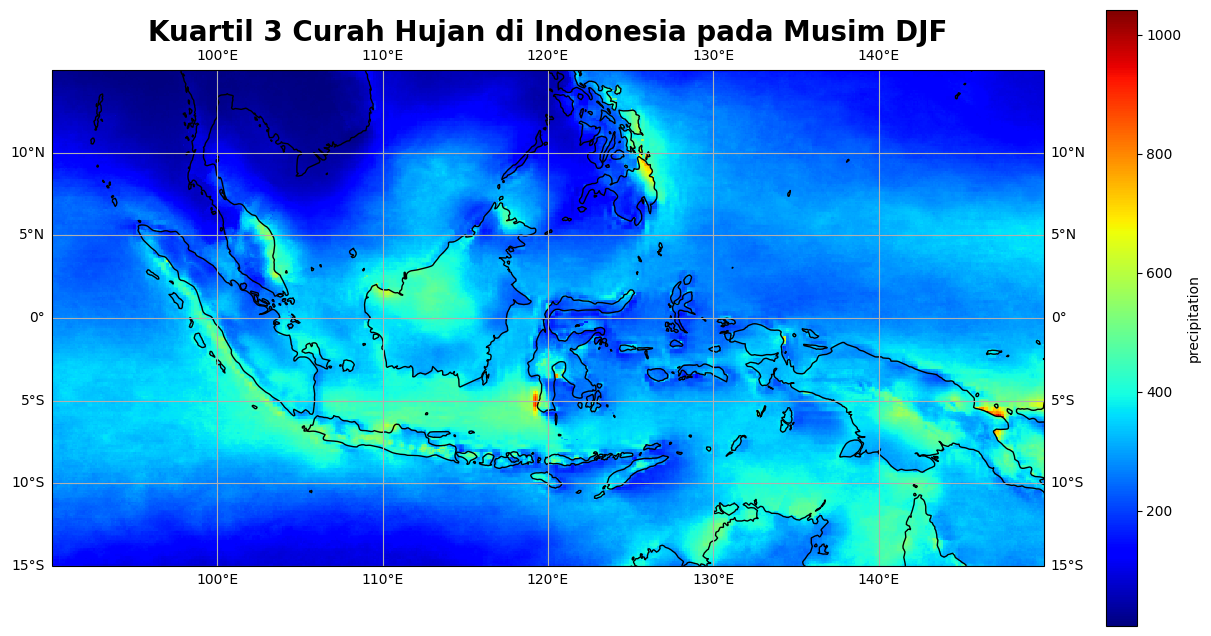

In [38]:
# Plot Musim DJF
prj = crt.crs.PlateCarree()
fgr = plt.figure(figsize=(16,8))
axs = plt.axes(projection = prj)
prClimQ3.sel(season = 'DJF').plot(ax = axs, transform = prj, cmap = 'jet') # ubah variabel dengan yang diinginkan
axs.set_title('Kuartil 3 Curah Hujan di Indonesia pada Musim DJF', fontsize = 20, fontweight = 'bold')
axs.coastlines()
axs.gridlines(draw_labels = True) 